In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
soldinfo = pd.read_table('soldinfo.txt', sep='\t')
sellinfo = pd.read_table('sellinfo.txt', sep='\t')

In [4]:
soldinfo.columns

Index(['houseCode', 'titleString', 'signPrice', 'listPrice', 'dealCycle',
       'signTime', 'houseAreaNum', 'unitPrice', 'resblockName', 'year',
       'buildingType', 'framePicUrl', 'elevator', 'isGarage',
       'frameOrientation', 'decorationType', 'districtName', 'bizcircleName',
       'districtId', 'subwayInfo', 'schoolInfo', 'floorInfo', 'longitude',
       'latitude'],
      dtype='object')

In [5]:
soldinfo = soldinfo.drop(['schoolInfo', 'framePicUrl', 'titleString', 'houseCode'], axis=1)

In [6]:
soldinfo.sample(5)

,signPrice,listPrice,dealCycle,signTime,houseAreaNum,unitPrice,resblockName,year,buildingType,elevator,isGarage,frameOrientation,decorationType,districtName,bizcircleName,districtId,subwayInfo,floorInfo,longitude,latitude
6911,50,68.0,183,2016.07.19,17.51,28556,小河东河下79号,1990.0,板楼,无电梯,False,东 西,毛坯,拱墅,桥西,330105,NaN,低楼层(共1层),120.142950,30.313044
5094,188,195.0,218,2019.06.14,58.80,31973,新元金沙家园,2014.0,板塔结合,有电梯,False,南,简装,钱塘新区,金沙湖,23011864,近地铁,高楼层(共24层),120.499494,30.325788
4833,600,710.0,27,2018.09.28,247.27,24265,荀庄,2014.0,板楼,有电梯,False,南,毛坯,余杭,瓶窑,330110,NaN,低楼层(共3层),120.028550,30.385132
2355,720,808.0,414,2019.10.15,199.99,36002,富力西溪悦居,2016.0,板塔结合,有电梯,False,南,精装,余杭,未来科技城,330110,近地铁,中楼层(共10层),120.034108,30.291028
3754,250,315.0,337,2019.05.07,74.55,33535,新安嘉苑,2008.0,板楼,有电梯,False,南,毛坯,西湖,文三西路,330106,NaN,中楼层(共11层),120.110914,30.274571


In [7]:
soldinfo.describe()

,signPrice,listPrice,houseAreaNum,unitPrice,year,districtId,longitude,latitude
count,8187.000000,8187.000000,8187.000000,8187.000000,7845.000000,8.187000e+03,8187.000000,8187.000000
mean,276.903628,372.115207,87.641083,32138.015024,2004.383939,1.349637e+06,120.177570,30.286568
std,182.438300,6631.107174,64.014247,13102.748516,9.490391,4.699784e+06,0.111936,0.075287
min,27.000000,27.000000,17.510000,185.000000,1900.000000,3.301020e+05,119.229765,29.286354
25%,164.000000,175.000000,57.660000,22186.500000,1998.000000,3.301040e+05,120.135989,30.248073
50%,234.000000,250.000000,83.770000,30495.000000,2005.000000,3.301060e+05,120.180467,30.285691
75%,344.500000,368.000000,100.210000,39922.500000,2013.000000,3.301100e+05,120.233528,30.324335
max,3000.000000,600000.000000,4446.000000,124446.000000,2019.000000,2.301186e+07,120.605964,30.493394


In [8]:
soldinfo.loc[np.abs(soldinfo.signPrice * 10000 / soldinfo.houseAreaNum / soldinfo.unitPrice - 1) > 0.02]

,signPrice,listPrice,dealCycle,signTime,houseAreaNum,unitPrice,resblockName,year,buildingType,elevator,isGarage,frameOrientation,decorationType,districtName,bizcircleName,districtId,subwayInfo,floorInfo,longitude,latitude
7860,40,52.0,12,2019.10.29,49.97,7845,西子阳光星城,2000.0,板楼,有电梯,False,南,简装,钱塘新区,高教园区西,23011864,近地铁,中楼层(共25层),120.499494,30.325788


In [9]:
soldinfo.loc[soldinfo.houseAreaNum > 500]

,signPrice,listPrice,dealCycle,signTime,houseAreaNum,unitPrice,resblockName,year,buildingType,elevator,isGarage,frameOrientation,decorationType,districtName,bizcircleName,districtId,subwayInfo,floorInfo,longitude,latitude
6212,82,82.0,26,2019.10.18,4446.0,185,紫云山庄,NaN,暂无数据,无电梯,False,南,其他,富阳,富阳,330183,NaN,低楼层(共3层),120.005717,30.149446


In [10]:
soldinfo = soldinfo.drop(6212, axis=0)

In [11]:
soldinfo.loc[soldinfo.listPrice > 2500]

,signPrice,listPrice,dealCycle,signTime,houseAreaNum,unitPrice,resblockName,year,buildingType,elevator,isGarage,frameOrientation,decorationType,districtName,bizcircleName,districtId,subwayInfo,floorInfo,longitude,latitude
4431,3000,3800.0,12,2019.04.11,292.40,102600,绿城元福里,2000.0,板楼,有电梯,False,南,其他,上城,湖滨,330102,近地铁,低楼层(共3层),120.177868,30.252239
5302,55,600000.0,1,2015.10.31,36.09,15240,新丰新村,1986.0,板楼,无电梯,False,南,其他,上城,四季青,330102,近地铁,高楼层(共6层),120.197805,30.249836
7399,2500,2900.0,220,2017.12.09,327.60,76313,武林壹号,2015.0,板楼,有电梯,False,南,精装,拱墅,湖墅,330105,NaN,高楼层(共20层),120.164978,30.283895
7440,2000,2798.0,221,2019.03.27,353.60,56562,武林外滩,2016.0,板塔结合,有电梯,False,西南,精装,下城,朝晖,330103,近地铁,高楼层(共21层),120.168133,30.287929
7761,2300,2580.0,103,2016.10.20,256.00,89844,中大吴庄,2001.0,板楼,有电梯,False,南 北,其他,上城,清波,330102,NaN,高楼层(共6层),120.168045,30.242835
8124,2000,3580.0,122,2019.11.03,363.30,55051,金色海岸,2007.0,塔楼,有电梯,False,南 北,其他,上城,南星,330102,近地铁,中楼层(共17层),120.193774,30.225353


In [12]:
soldinfo = soldinfo.drop(5302)

In [13]:
soldinfo.loc[soldinfo.signPrice / soldinfo.listPrice < 0.4]

,signPrice,listPrice,dealCycle,signTime,houseAreaNum,unitPrice,resblockName,year,buildingType,elevator,isGarage,frameOrientation,decorationType,districtName,bizcircleName,districtId,subwayInfo,floorInfo,longitude,latitude
919,40,120.0,1,2016.08.25,47.54,8414,西健康路121号,2000.0,板楼,无电梯,False,南,其他,下城,丝绸城,330103,近地铁,中楼层(共7层),120.181464,30.273264
969,150,395.0,8,2017.02.19,73.36,20448,东清大厦,2005.0,板楼,有电梯,False,南 北,其他,下城,长庆,330103,近地铁,中楼层(共20层),120.184092,30.264010
3697,50,500.0,9,2019.03.29,129.05,3875,城北商贸园,2003.0,板楼,无电梯,False,南,其他,西湖,申花,330106,近地铁,高楼层(共6层),120.100001,30.318109
3920,35,100.0,37,2019.10.09,23.86,14669,绿城桃花源,2015.0,板楼,无电梯,False,南,精装,余杭,闲林,330110,NaN,低楼层(共2层),119.952215,30.251681
6565,180,700.0,338,2019.07.09,51.55,34918,文溪鼎园,2013.0,板楼,有电梯,False,南,精装,西湖,文一西路,330106,NaN,高楼层(共17层),120.111932,30.295338
7329,35,92.0,49,2019.05.20,43.96,7962,苋浦社区,1999.0,板楼,无电梯,False,南,简装,富阳,富阳,330183,NaN,高楼层(共7层),119.966556,30.054723
7846,120,560.0,310,2019.10.30,180.00,6667,翡翠城三期,2011.0,板塔结合,无电梯,False,南,精装,余杭,翡翠城,330110,NaN,中楼层(共4层),120.031536,30.250035
7870,80,300.0,1,2016.04.26,161.00,4969,五云东路,2003.0,板楼,无电梯,False,南 北,其他,西湖,之江,330106,NaN,低楼层(共1层),120.120528,30.190572


In [14]:
soldinfo = soldinfo.drop([3697, 7846])

In [15]:
soldinfo.loc[soldinfo.unitPrice < 5000]

,signPrice,listPrice,dealCycle,signTime,houseAreaNum,unitPrice,resblockName,year,buildingType,elevator,isGarage,frameOrientation,decorationType,districtName,bizcircleName,districtId,subwayInfo,floorInfo,longitude,latitude
7870,80,300.0,1,2016.04.26,161.0,4969,五云东路,2003.0,板楼,无电梯,False,南 北,其他,西湖,之江,330106,NaN,低楼层(共1层),120.120528,30.190572


In [16]:
soldinfo.describe()

,signPrice,listPrice,houseAreaNum,unitPrice,year,districtId,longitude,latitude
count,8183.000000,8183.000000,8183.000000,8183.000000,7842.000000,8.183000e+03,8183.000000,8183.000000
mean,277.001466,298.834804,87.098425,32150.551387,2004.385616,1.350136e+06,120.177616,30.286590
std,182.428158,207.914236,42.146891,13093.096932,9.489628,4.700879e+06,0.111932,0.075287
min,27.000000,27.000000,17.510000,4969.000000,1900.000000,3.301020e+05,119.229765,29.286354
25%,164.000000,175.000000,57.660000,22208.000000,1998.000000,3.301040e+05,120.135991,30.248073
50%,234.000000,250.000000,83.760000,30505.000000,2005.000000,3.301060e+05,120.180476,30.285691
75%,345.000000,368.000000,100.080000,39923.500000,2013.000000,3.301100e+05,120.233528,30.324335
max,3000.000000,3800.000000,492.490000,124446.000000,2019.000000,2.301186e+07,120.605964,30.493394


In [17]:
soldinfo.decorationType.value_counts()

精装    3219
简装    2555
其他    1623
毛坯     786
Name: decorationType, dtype: int64

In [18]:
soldinfo.loc[np.abs(soldinfo['listPrice'] * 10000 / soldinfo['houseAreaNum'] / soldinfo['unitPrice'] - 1) > 0.5]

,signPrice,listPrice,dealCycle,signTime,houseAreaNum,unitPrice,resblockName,year,buildingType,elevator,isGarage,frameOrientation,decorationType,districtName,bizcircleName,districtId,subwayInfo,floorInfo,longitude,latitude
12,420,660.0,67,2019.04.30,132.50,31699,颐景园,2000.0,板楼,无电梯,False,南 北,其他,西湖,文三西路,330106,近地铁,低楼层(共6层),120.104746,30.286209
334,85,140.0,92,2018.05.03,50.82,16726,海辰水岸晶座,2012.0,板楼,有电梯,False,南 北,精装,下城,石桥,330103,NaN,中楼层(共10层),120.208530,30.339810
426,192,300.0,4,2016.07.05,58.62,32754,小河东河下58号,2010.0,板楼,有电梯,False,东,其他,拱墅,桥西,330105,NaN,低楼层(共1层),120.142950,30.313044
427,158,350.0,4,2016.07.05,58.62,26954,小河东河下58号,2010.0,板楼,有电梯,False,东,其他,拱墅,桥西,330105,NaN,低楼层(共1层),120.142950,30.313044
751,280,450.0,193,2016.11.29,128.79,21741,万安城市花园东苑,1999.0,板塔结合,有电梯,False,东南,其他,上城,潮鸣,330102,近地铁,中楼层(共11层),120.186719,30.261565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,150,275.0,25,2019.08.28,105.39,14233,西园凤都苑,2004.0,板楼,有电梯,False,南 北,其他,余杭,未来科技城,330110,NaN,中楼层(共6层),119.954760,30.267318
7870,80,300.0,1,2016.04.26,161.00,4969,五云东路,2003.0,板楼,无电梯,False,南 北,其他,西湖,之江,330106,NaN,低楼层(共1层),120.120528,30.190572
7907,100,160.0,158,2019.11.02,49.81,20077,玲珑府,2016.0,板楼,有电梯,False,西,精装,滨江,西兴,330108,近地铁,高楼层(共21层),120.232117,30.189710
7973,76,120.0,52,2019.10.31,64.96,11700,良渚文化村春漫里,2012.0,板塔结合,有电梯,False,南,精装,余杭,良渚,330110,NaN,中楼层(共5层),120.030147,30.364558


> ### 每平米售价与占地面积的关系

(0, 1500)

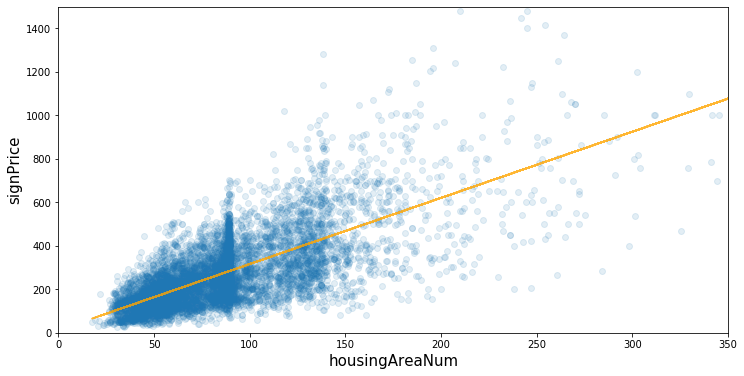

In [167]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.scatter(soldinfo.houseAreaNum, soldinfo.signPrice, alpha=0.12)
poly = np.polyfit(soldinfo.houseAreaNum, soldinfo.signPrice, deg=1)
z = np.polyval(poly, soldinfo.houseAreaNum)
plt.plot(soldinfo.houseAreaNum, z, color='orange', alpha=0.8)
plt.ylabel('signPrice', fontdict={'fontsize':15})
plt.xlabel('housingAreaNum', fontdict={'fontsize':15})
plt.xlim(0, 350)
plt.ylim(0, 1500)

> ### 不同地域每平米售价与占地面积的关系

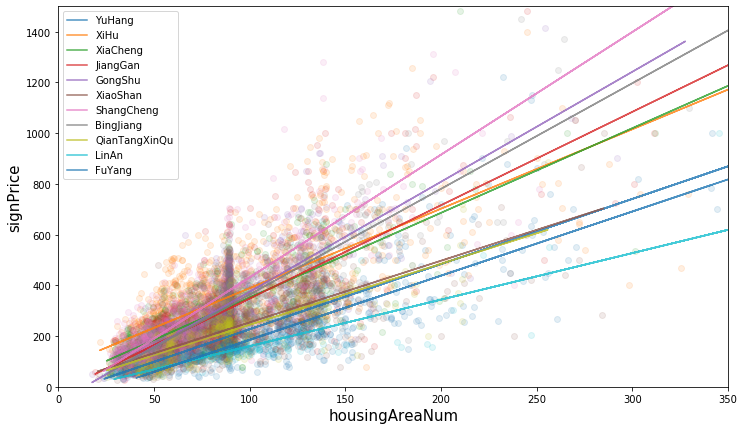

In [166]:
soldinfo.districtName.value_counts()
districtName = ['余杭', '西湖', '下城', '江干', '拱墅', '萧山', '上城', '滨江', '钱塘新区', '临安', '富阳']
plt.figure(figsize=(12, 7))
plt.xlim(0,350)
plt.ylim(0, 1500)
plt.ylabel('signPrice', fontdict={'fontsize':15})
plt.xlabel('housingAreaNum', fontdict={'fontsize':15})
for name in districtName:
    plt.scatter(soldinfo.loc[soldinfo.districtName == name].houseAreaNum, soldinfo.loc[soldinfo.districtName == name].signPrice, alpha=0.12)
    poly = np.polyfit(soldinfo.loc[soldinfo.districtName == name].houseAreaNum, soldinfo.loc[soldinfo.districtName == name].signPrice, deg=1)
    z = np.polyval(poly, soldinfo.loc[soldinfo.districtName == name].houseAreaNum)
    plt.plot(soldinfo.loc[soldinfo.districtName == name].houseAreaNum, z, alpha=0.8)
plt.legend(['YuHang', 'XiHu', 'XiaCheng', 'JiangGan', 'GongShu', 'XiaoShan', 'ShangCheng', 'BingJiang', 'QianTangXinQu', 'LinAn', 'FuYang'])

> ### 不同区房价中位数
> - 房价中位数最能代表普通消费者的购买力

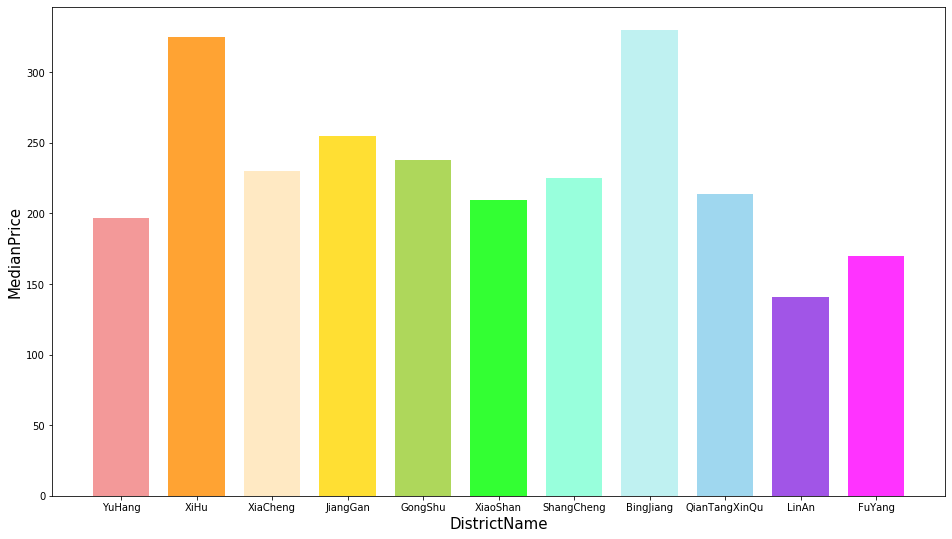

In [165]:
district_name = ['YuHang', 'XiHu', 'XiaCheng', 'JiangGan', 'GongShu', 'XiaoShan', 'ShangCheng', 'BingJiang', 'QianTangXinQu', 'LinAn', 'FuYang']
price_median = [soldinfo.loc[soldinfo['districtName'] == x].signPrice.median() for x in districtName]
plt.figure(figsize=(16, 9))
plt.ylabel('MedianPrice', fontdict={'fontsize':15})
plt.xlabel('DistrictName', fontdict={'fontsize':15})
color_s = ['lightcoral', 'darkorange', 'moccasin', 'gold', 'yellowgreen', 'lime', 'aquamarine', 'paleturquoise', 'skyblue', 'blueviolet', 'fuchsia']
color_num = 0
d =eval('dict(' + ','.join(list(map(lambda x,y:x + '=' + str(y), district_name, price_median)))+')')
for x, y in d.items():
    plt.bar(x, y, alpha=0.8, width=0.75, color=color_s[color_num])
    color_num += 1

> ### 不同区每平米售价箱线图
>  - 可以展示每个区房价的主要区间段

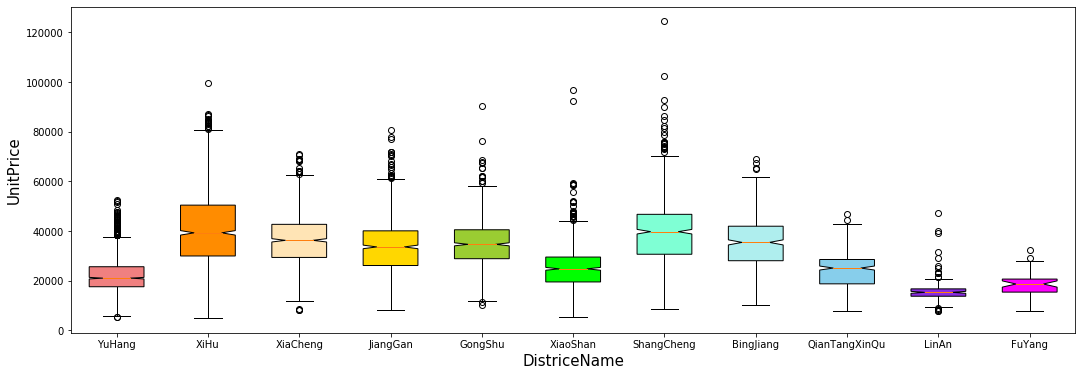

In [22]:
%matplotlib inline
price_s = [soldinfo.loc[soldinfo['districtName'] == name].unitPrice for name in districtName]
plt.figure(figsize=(18, 6))
# plt.boxplot(price_s, notch=True, patch_artist=True, boxprops={'facecolor':'green'})
num = 0
for price in price_s:
    plt.boxplot(x=price,
                positions=[num],
                notch=True,
                patch_artist=True,
                labels=[district_name[num]],
                boxprops={'facecolor':color_s[num], 'color':'black'},
                widths=0.6)
    num += 1
plt.xlabel("DistriceName", fontdict={'fontsize':15})
plt.ylabel("UnitPrice", fontdict={'fontsize':15})
plt.show()

> ### 地铁对房价的影响

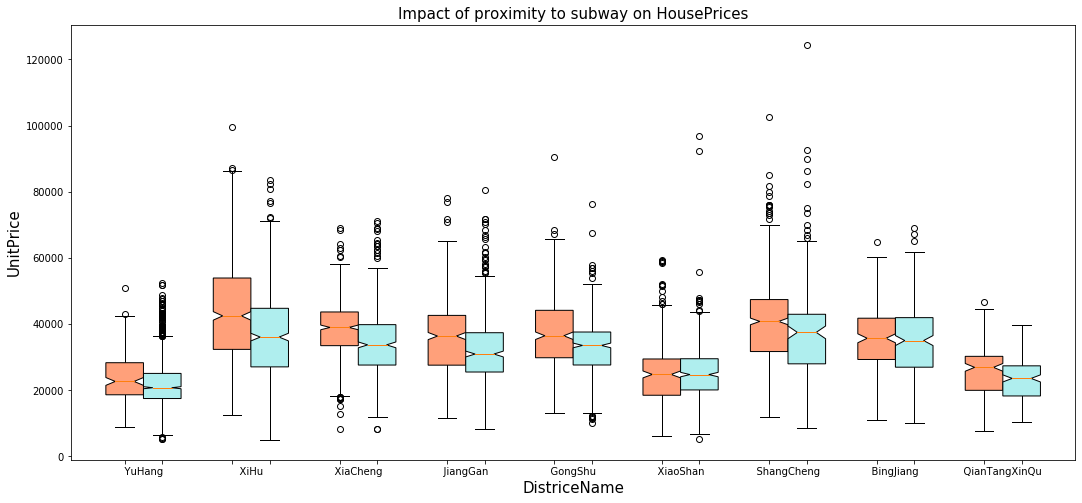

In [23]:
color_s = ['lightsalmon', 'paleturquoise']
subway_yes = soldinfo.loc[soldinfo['subwayInfo'] == '近地铁']
subway_no = soldinfo.loc[soldinfo['subwayInfo'] != '近地铁']
num = 0
district_name[0]
subway_yes.loc[subway_yes['districtName'] == districtName[num]].unitPrice
plt.figure(figsize=(18, 8))
for num in range(len(district_name)):
    if district_name[num] in ['LinAn', 'FuYang']:
        continue
    plt.boxplot(x=subway_yes.loc[subway_yes['districtName'] == districtName[num]].unitPrice, 
               notch=True,
               patch_artist=True,
               positions=[num],
               labels=['            ' + district_name[num]],
               boxprops={'facecolor':color_s[0], 'color':'black'},
               widths=0.35)
    plt.boxplot(x=subway_no.loc[subway_no['districtName'] == districtName[num]].unitPrice, 
               notch=True,
               patch_artist=True,
               positions=[num + 0.35],
               labels=[''],
               boxprops={'facecolor':color_s[1], 'color':'black'},
               widths=0.35)
plt.xlabel("DistriceName", fontdict={'fontsize':15})
plt.ylabel("UnitPrice", fontdict={'fontsize':15})
plt.title("Impact of proximity to subway on HousePrices", fontdict={'fontsize':15})
plt.show()

In [131]:
resblockSell = pd.read_table('resblocksell.txt', sep='\t')
resblockSell = resblockSell.drop(['title', 'address'], axis=1)
resblockSell.rename(columns={'decoration':'decorationType'}, inplace=True)
sellinfo.rename(columns={'decorateType':'decorationType'}, inplace=True)
resblockSell.houseType.value_counts()

商业类    1169
住宅     1106
别墅      636
商业      262
写字楼     169
底商      115
Name: houseType, dtype: int64

In [82]:
'''商业类与商业、底商重复'''
resblockSell.houseType[resblockSell.houseType == '商业'] = '商业类'
resblockSell.houseType[resblockSell.houseType == '底商'] = '商业类'

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
houseType = resblockSell['houseType'].value_counts().keys()
houseType_dict = dict(商业类='business',
                     住宅='house',
                     别墅='villa',
                     写字楼='office')
houseType_dict

{'商业类': 'business', '住宅': 'house', '别墅': 'villa', '写字楼': 'office'}

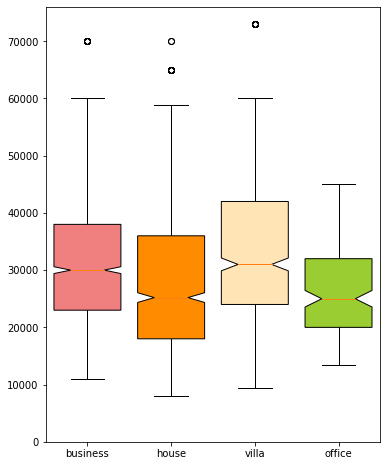

In [84]:
%matplotlib inline
num = 0
color_s = ['lightcoral', 'darkorange', 'moccasin', 'yellowgreen', 'aquamarine', 'skyblue']

plt.figure(figsize=(6, 8))
for h in houseType:
    plt.boxplot(x=resblockSell.loc[resblockSell.houseType == h].unitPrice,
               positions=[num],
               notch=True,
               patch_artist=True,
               boxprops={'facecolor':color_s[num], 'color':'black'},
               widths=0.8,
               labels=[houseType_dict[h]])
    num += 1
plt.ylim([0, 76000])
plt.show()

In [134]:
resblockSell.decorationType.value_counts()

精装修    1735
毛坯     1711
Name: decorationType, dtype: int64

In [136]:
sellinfo.decorationType.value_counts()

精装    4739
简装    4168
毛坯    1313
其他     109
Name: decorationType, dtype: int64

In [144]:
resblockSell.decorationType[resblockSell.decorationType == '精装修'] = '精装'
resblockSell[['decorationType', 'unitPrice']]

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,decorationType,unitPrice
0,精装,46500.0
1,精装,47000.0
2,精装,47059.0
3,精装,46812.0
4,精装,58900.0
...,...,...
3452,毛坯,23700.0
3453,精装,47200.0
3454,精装,25200.0
3455,毛坯,23700.0


In [162]:
decoration_info = pd.concat([resblockSell[['decorationType', 'unitPrice']], soldinfo[['decorationType', 'unitPrice']], sellinfo[['decorationType', 'unitPrice']]], axis=0)

In [163]:
decoration_info.decorationType.value_counts()

精装    9693
简装    6723
毛坯    3810
其他    1732
Name: decorationType, dtype: int64

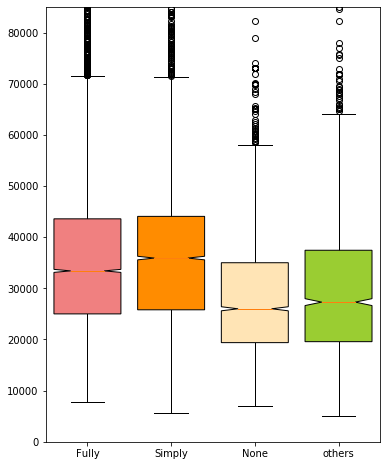

In [164]:
%matplotlib inline
decoration_dict = dict(精装='Fully',
                      简装='Simply',
                      毛坯='None',
                      其他='others')
num = 0
plt.figure(figsize=(6, 8))
for key,value in decoration_dict.items():
    plt.boxplot(x=decoration_info.loc[decoration_info.decorationType == key].unitPrice,
               positions=[num],
               notch=True,
               patch_artist=True,
               boxprops={'facecolor':color_s[num], 'color':'black'},
               widths=0.8,
               labels=[value])
    num += 1
plt.ylim([0, 85000])
plt.show()